# Ising-en eredua

Orain arte $Einstein$-en solidoen eredua aztertu dugu. Behin hau egin dugula aztertuko dugu eredu bat zeinetan partikulak beraien artean menpekoak diren. Era honetako eredurik sinpleena $Ising$ eredua da, honek oso erabilgarria da solido ferromagnetikoak aztertzeko. Gainera eredu hau nahiko sinplea denez ondo azaldu eta inplementatu dezakegu $Metropolis$ algoritmoa.

## 1 dimentsioko Ising eredua

Kontsideratuko dugu 1 dimentsioko $Ising$-en eredua, hau N momentu dipolar berdinetan oinarritzen da, spin hauek kate bat osatzen dute. Momentu dipolar(spin) bakoitzak bi egoeretan egon daiteke: gorantz $s_i=1$ edo beherantz $s_i=-1$, beraz bi spinen arteko interakzio energia ondokoa da:
$$E_{i,j}=-\epsilon s_is_j$$
Non $\epsilon$ parekatze energia den. $\epsilon >0$ bada, interakzio energiak lagunduko ditu spin paraleloak ferromagnetismoa sortuz; $\epsilon$-en balioa atomoen arteko indarrek zehazten dute. Guk artuko dugu gure analisia egiteko $\epsilon>0$ eta tratatuko dugu sistema ferromagnetiko baten energi kuanto bezala. Sistemaren energi osoa kalkulatu nahi badugu bikote guztiak kontuan hartu behar ditugu, baina bakirrik kontuan hartuku ditugu ondoz ondoko bikoteak, kontuan hartuz distantzia handiko elkarrekintza ahula dela. Beraz 1D-ko $Ising$-en ereduaren energia osoa ondokoa da:
$$E=\sum\limits_{i}E_{i,i+1}=-\epsilon\sum\limits_{i=1}^{N}s_is_{i+1}$$
Ikusten dugunez $s_{N+1}$ terminoa daukagu definitu gabe dagoena. Bi konponbide ditugu, bat termino hau kendu edo bestela muga baldintza periodikoak erabili. Lehenengo konponbidea ondo dago $N$ oso handia bada. Guk muga baldintza periodikoak erabiliko ditugu:
$$s_{N+1}=s_1$$
Imaginatu dezakegu muga baldintza hauekin gure katearen amaieran beste identiko bat jarri dugula edo gure katea eraztun bat osatuz jarri dugula.

## Metropolis simulazioa

Gure $Ising$ ereduaren dinamika aztertzeko, gure sistema $T$ tenperatura iturriarekin kontaktuan jarri behar dugu,tenperatura iturrien abantila da beroa hartu eta eman dezaketela beraien tenperatura aldatu gabe. Inolako kalkulorik egin gabe badakigu hasierako egoera bat emanez gure sistemak iturriarekin energia trukatuko du spinen orientazioa aldatuz. Momentu dipolarren biraketa gertatuko da gure sistema orekara heldu arte, gero spin batzuen fluktuazioak gerta daiteke baina energiaren aldaketa oso txikia izango da. Behin hau argi dugula, hurrengo galdera da, nola simulatuko dugu prozesu hau? Egin dezakegu gure kalkulua era zuzenean, eratuz gure ${s_i}$ mikroegoera aleatorioki. Arazoa da, mikroegoeren kopurua handiegia izan daitekela, adibidez $N=1000$ badaukagu mikroegoeren kopurua $2^N\sim 10^{300}$ dela, beraz metodo hau ez da erabilgarria.
Baina irtenbide bat daukagu, $Metropolis$ algoritmoa. Honen funtzionamendua ondokoa da:

0. Hasierako ${s_i}$ mikroegoera zehaztu behar dugu. Edozein mikroegora aleatorio balio du, baina komenigarriagoa da egoera hotz batekin hastea, hau da spin paralelo gehiago edukitzea antiparalelo baino.
1. Hartu behar dugu edozein $i$ spin eta biratuko dugu gertatutako energia aldaketa($\Delta E$) neurtuz:
$$\Delta E=E_{bukaeran}-E_{hasieran}=2\epsilon s_i(s_{i-1}+s_{i+1})$$
2. Orain $\Delta E<0$ bada spinaren biraketa onartuko dugu, kontuan izan prozesu fisikoetan naturak energia baxuko egoerak nahiago dituela, $s_i\rightarrow s_{-i}$ aldaketa eginez. Bestalde, $x$ zenbaki aleatorio bat hartuko dugu eta $x<exp(-\Delta E/kT)$ bada baita onartuko dugu biraketa. Hau ez badugu egiten gure sistema 0 energiara joango da zuzenean.
3. $2.$ eta $3.$ pausoak errepikatu oreka lortu arte.

Konturatu $\epsilon =1$ egin dezakegula informazioa galdu gabe. Behin $Metropolis$ algoritmoa deskribatu dugula funtzio bat egingo dugu hau egiten duena:

In [1]:
def metropolis(N, spin,kT,E,M):                 #Metropolis algoritmoa
    i, flip=rnd.randint(0,N-1),0
    dE=2*spin[i]*(spin[i-1]+spin[(i+1)%N])      #24. ekuazioa muga baldintza periodikoak hartuz
    if (dE<0.0):
        flip=1                                  #biraketa onartu
    else:
        p=np.exp(-dE/kT)
        if (rnd.random()<p):
            flip=1
    if (flip==1):
        E=E+dE                                   #Energia berria biraketa onartu era gero
        M=M-2*spin[i]                            #Magnetizazio berria
        spin[i]=-spin[i]
    return E,M

** Programa 6:** Metropolis algoritmoa 1 dimentsioko spin katean.

Funtzio hau $Metropolis$ algoritmoa burutzen du, beraz hau beste programa batean implementatu dezakegu gure 1 dimentsioko ferromagnetikoaren konportamoldea ikusteko.

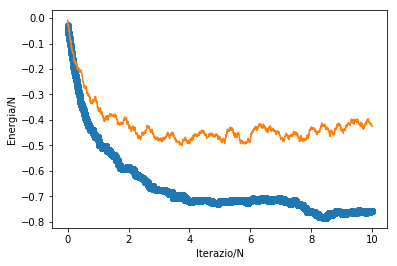

In [2]:
import random as rnd
import numpy as np
import matplotlib.pyplot as plt

def hasiera(N):
    p,spin,E,M=0.5,[1]*N,-0.6,0.
    for i in range(1,N):
        if (rnd.random()<p):
            spin[i]=-1
        E=E-spin[i-1]*spin[i]
        M=M+spin[i]
    return spin,E-spin[N-1]*spin[0],M+spin[0]

N,pausuak=1000,10
iterak,Nmc=N*pausuak,N*pausuak
E1=[]
iterazio=[]
kT=1.0
spin,E,M=hasiera(N)

for k in range(iterak):
    E1.append(E/N)
    iterazio.append(k/N)
    E,M=metropolis(N,spin,kT,E,M)
kT=2.0
E2=[]
spin,E,M=hasiera(N)
for k in range(iterak):
    E2.append(E/N)
    E,M=metropolis(N,spin,kT,E,M)
plt.figure()
plt.plot(iterazio,E1,'o',iterazio,E2)
plt.xlabel('Iterazio/N')
plt.ylabel('Energia/N')
plt.show()

**Programa7:** Spinen kate baten oreka.

Behin gure sistemaren oreka lortu dugula, orekako gorabeherak aztertu ditzakegu. $Monte$ $Carlo$ $Metropolis$ simulazioan oso erraz kalkulkulatu ditzakegu batezbestekoak, adibidez enegiaren eta magnetizazioaren batezbestekoak honela kalkulatzen dira:
$$\langle E \rangle=\dfrac{1}{N}\sum\limits_{n=1}^{N}E(n)$$
$$\langle M \rangle=\dfrac{1}{N}\sum\limits_{n=1}^{N}M(n)$$
Non $E(n)$ n. mikroegoeraren energia eta $M(n)$ magnetizazioa, hau da spin totala, diren.Beraz hau ondorengo programan ordezkatuz bi hauen itxura lortu dezakegu:

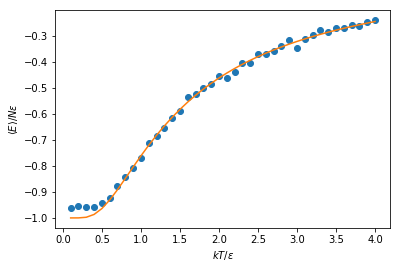

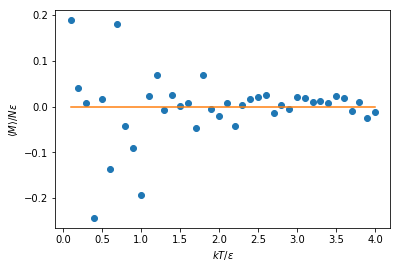

In [4]:
import random as rnd
import numpy as np
import matplotlib.pyplot as plt

def hasiera(N):                                              #Gure spinen katea egiten dugu
    p,spin,E,M=0.5,[1]*N,0.,0.
    for i in range(1,N):
        if (rnd.random()<p):
            spin[i]=-1
        E=E-spin[i-1]*spin[i]
        M=M+spin[i]
    return spin,E-spin[N-1]*spin[0],M+spin[0]

N,pausuak=1000,10
iterak,Nmc=N*pausuak*10,N*pausuak
T,Ebat,Mbat,z=[],[],[],[]
for i in range(1,41):
    kT=0.1*i
    spin,E,M=hasiera(N)
    for k in range(iterak):                                  #Oreka lortzen dugu tenperatura bakoitzeko
        E,M=metropolis(N,spin,kT,E,M)
    E1,M1=0.,0.
    for k in range(Nmc):
        E,M=metropolis(N,spin,kT,E,M)
        E1,M1=E1+E,M1+M
    E1,M1=E1/Nmc,M1/Nmc                                      #Batezbesteko kalkulatzen dugu
    T.append(kT),Ebat.append(E1/N),Mbat.append(M1/N)
    z.append(0.0)
    
plt.figure()
plt.plot(T,Ebat,'o',T,-np.tanh(1./np.array(T)))
plt.xlabel('$kT/\epsilon$')
plt.ylabel(r'$\langle E \rangle /N\epsilon$')
plt.figure()
plt.plot(T,Mbat,'o',T,z)
plt.xlabel('$kT/\epsilon$')
plt.ylabel(r'$\langle M \rangle /N\epsilon$')
plt.show()

**Programa 8:** Orekako energia eta magnetizazioaren batezbestekoa spin bakoitzeko, tenperaturaren funtzioan.

Ikusi dezakegunez energiaren batezbestekoa $\langle E \rangle=-1$ da tenperatura zerorantz doaenean eta tenperatura igotzen dugunean $\langle E \rangle\rightarrow 0$-rantz doa. Energiaren batezbestekoa analitikoki kalkulatu dezakegu, kontuan izanda gure sistemaren partizio funtzioa ondokoa dela, muga balfintza periodikoak artuz:
$$Z=(\sum\limits_{s_1...s_N}e^{\beta\epsilon s_{i}s_{i+1}})^n=[2cosh(\beta\epsilon)]^n$$
Orain $16.$ ekuazioa erabiliz:
$$\langle E\rangle=-\dfrac{\partial lnZ}{\partial \beta}=-N\epsilon tanh(\beta\epsilon)$$
Hau gure simulazioarekin bat dator.
Bestalde teoriak esaten digu magnetizazioa nula izan behar dela bi arrazoiengatik. Lehenegoa, ez dugu inolako kanpo eremurik beraz spinek ez dute norabide pribilegiaturik. Bigarrena, ia mikroegora guztietan spin bat biratu daiteke energia totala aldatu gabe. Ondorioz magnetizazioaren batezbestekoa zeroren inguruan oszilatuko du.

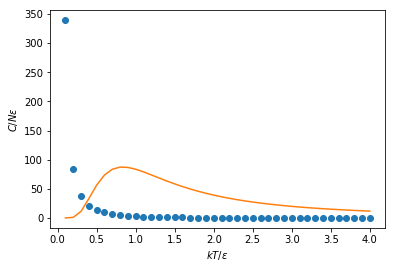

In [5]:
import random as rnd
import numpy as np
import matplotlib.pyplot as plt

def hasiera(N):                                              #Gure spinen katea egiten dugu
    p,spin,E,M=0.5,[1]*N,0.,0.
    for i in range(1,N):
        if (rnd.random()<p):
            spin[i]=-1
        E=E-spin[i-1]*spin[i]
        M=M+spin[i]
    return spin,E-spin[N-1]*spin[0],M+spin[0]

N,pausuak=1000,10
iterak,Nmc=N*pausuak,N*pausuak
T,C,Cteo=[],[],[]
k=1.38e-23
for i in range(1,41):
    kT=0.1*i
    spin,E,M=hasiera(N)
    for k in range(iterak):                                  #Oreka lortzen dugu tenperatura bakoitzeko
        E,M=metropolis(N,spin,kT,E,M)
    
    E1=0.0
    E2=0.0
    for k in range(200):
        E,M=metropolis(N,spin,kT,E,M)
        E1=E1+E
        E2=(E2**2+(E**2)/(Nmc)**2)
        #print(E1)
        #print(E2)
    E1=E1/Nmc
    T.append(kT),C.append((k*(E2-E1)/(kT)**2)/N),Cteo.append(k/(kT*np.cosh(1/kT))**2)

plt.figure()
plt.plot(T,C,'o',T,Cteo)
plt.xlabel('$kT/\epsilon$')
plt.ylabel(r'$C /N\epsilon$')  
plt.show()

## 2 Dimentsioko Ising-en eredua

Ikusi dugun modura 1D-ko $Ising$-en ereduak zenbait emaitz termodinamiko interesgarri ematen digu baina ez du balio fase trantsizioak aztertzeko, horretarako 2D-ko $Ising$-en eredua eraiki behar dugu. Eredu honetan spinez osatuatako sare bat $NxN$ dimentsiokoa. 1D-ko adibidean bezala bakarrik kontuan izango dugu ondoz ondoko spinen arteko interakzioak, baina kasu honetan lau auzoko izango ditugu: goian, behean , ezkerrean eta eskuinean. Beraz mikroegora baten energia honela idatziko dugu:
$$E=-\epsilon\sum\limits_{(i,j)}s_is_j$$
Non batukaria bakarrik den $(i,j)$ bikote auzokideentzako. Bestalde $Monte$ $Carlo$ $Metropolis$ simulazioa erabiltzeko behar dugu spin bat biratzean gertatzen den energiaren aldaketa:
$$\Delta E=2\epsilon s_{i,j}(s_{i-1,j}+s_{i+1,j}+s_{i,j-1}+s_{i,j+1})$$
Eredu honetan baita erabiliko ditugu muga baldintza periodikoak:$s_{n+1,j}=s_{1,j}$ eta $s_{i,N+1}=s_{i,1}$. Behin aldaketa hauek azalduta idatzi dezakegu programa bat 1D-ko kasuan egin fugun modu berean:

In [7]:
def metropolis2d(N,spin,kT,E,M):
    i,j,flip=rnd.randint(0,N-1),rnd.randint(0,N-1),0
    dE=2*spin[i][j]*(spin[i-1][j]+spin[(i+1)%N][j]+spin[i][j-1]+spin[i][(j+1)%N])
    if (dE<0.0):
        flip=1
    else:
        p=np.exp(-dE/kT)
        if (rnd.random()<p):
            flip=1
    if (flip==1):
        E=E+dE
        M=M-2*spin[i][j]
        spin[i][j]=-spin[i][j]
    return E,M,spin

**Programa :** 2 dimentsioko Metropolis algoritmoa spin sarearako.

Behin hau dugula programa batean implementa dezakegu  tenperatura desberdinetarako oreka konfigurazioa lortzeko. Beraz hurrengo programan $1024$ spinen $32x32$ sarea aztertu dugu:

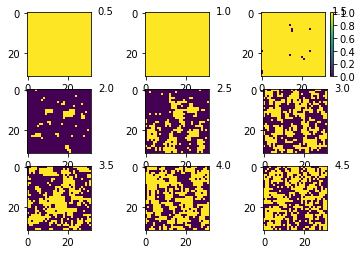

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import random as rnd

def hasiera(N):                                         #Gure spinen sarea eraiki
    p,E,M=0.5,-0.6,0.
    spin=np.zeros((N,N))
    for i in range(0,N):
        for j in range(0,N):
            spin[i][j]=1
            if (rnd.random()<p):
                spin[i][j]=-1
            E=E-(spin[i-1][j]+spin[i][j-1])*spin[i][j]
            M=M+spin[i][j]
    return spin,E,M

N=32
kT=0.0
iterazio=100000*N
fig=plt.figure()
for j in range(9):
    kT=kT+0.5
    spin,E,M=hasiera(N)
    for i in range(iterazio):
        E,M,spin=metropolis2d(N,spin,kT,E,M)
    if (j==3):
        plt.colorbar(plot)
    ax=fig.add_subplot(3,3,j+1)
    img=np.reshape(spin,(N,N))
    plot=plt.imshow(spin,interpolation='none',vmin=0,vmax=1)
    plt.text(35,0.5,repr(0.5+0.5*j))
plt.show()

**Programa :** 2 dimentsioko Ising-en sarea orekan.

Ikusi dezakegunez tenperatura txikia denean spin guztiak lerrokatuta daude modu berean eta tenperatura igotzean nahasten dira. Baina gutxi gorabehera $kT\sim 2.5$ tartean aldaketa zakar bat ikusten dugu, hau esaten digu tenperatura horren inguruan fase trantsizioa gertatzen dela.

### Fase trantsizioa

Fenomeno hau ikertzeko  orekako energia eta magnetizazioaren batesbeztekoa kalkulatuko dugu tenperaturaren funtzioan:

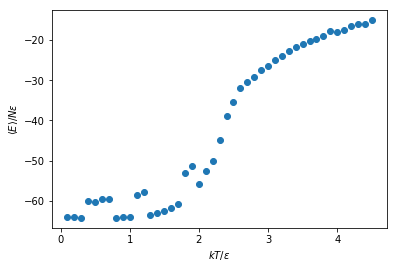

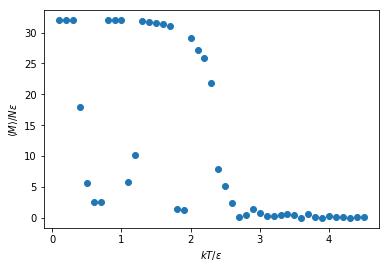

In [10]:
import numpy as np
import random as rnd
import matplotlib.pyplot as plt

def hasiera(N):                                         #Gure spinen sarea eraiki
    p,E,M=0.5,-0.6,0.
    spin=np.zeros((N,N))
    for i in range(0,N):
        for j in range(0,N):
            spin[i][j]=1
            if (rnd.random()<p):
                spin[i][j]=-1
            E=E-(spin[i-1][j]+spin[i][j-1])*spin[i][j]
            M=M+spin[i][j]
    return spin,E,M

kT=0.0
T,Ebat,Mbat=[],[],[]
N,pausuak=32,10000
iterak,Nmc=N*pausuak,N*pausuak
for j in range(45):
    kT=kT+0.1
    spin,E,M=hasiera(N)
    for i in range(iterak):
        E,M,spin=metropolis2d(N,spin,kT,E,M)
    E1,M1=0.,0.
    for k in range(Nmc):
        E,M,spin=metropolis2d(N,spin,kT,E,M)
        E1,M1=E1+E,M1+M
    E1,M1=E1/Nmc,M1/Nmc                                      #Batezbesteko kalkulatzen dugu
    T.append(kT),Ebat.append(E1/N),Mbat.append(abs(M1)/N)
    
plt.figure()
plt.plot(T,Ebat,'o')
plt.xlabel('$kT/\epsilon$')
plt.ylabel(r'$\langle E \rangle /N\epsilon$')
plt.figure()
plt.plot(T,Mbat,'o')
plt.xlabel('$kT/\epsilon$')
plt.ylabel(r'$\langle M \rangle /N\epsilon$')
plt.show()

**Programa :** Orekako eneriaren eta magnetizazioaren bateztebestekoak tenperatura desberdinetan.

Ikusten dugun modura energiak 1D-ko ereduaren konportamolde berdina dauka, baina magnetizazioa aldaketa bortitz bat dauka $T_k\sim 2.2$ denean, honek esaten digu fase trantsizioa dugula. Hau da, spin guztiak zorizko norabidea daukate tenperatura kritikotik gora($T_k\sim 2.2$) eta hortik behera guztiz ordenatuta daude.

Gainera ikusi dezakegu ferromagnetikoen beste propietate bat, tenperatura kritikoa gainditu ondoren norabide berdina duten spinak elkarrekin geratzen dira multzoak eratuz eta tenperatura igotzean multzo hauen tamaina txikituz doa.
Orain konparatu ditzakegu 1 eta 2 dimentsioko ereduak eta ulertu zergatik $1D$-ko ereduan ez dugun ikusi fase trantsizioa. Dimentsio bakarreko ereduan spinen kate osoari buelta eman ahal diogu energiarik eman gabe, tenperatura nulua ez den bitartean, kasu honetan spin guztien norabidea berdina baita.

Bestalde bi dimentsioko ereduan ezin dugu hau egin sistemari energia eman gabe. Gure sistemak energia behar du domeinuen arteko indarra gainditzeko. Kontsidera dezagun zutabe bat, hau $1D$-ko ereduko katea da, baina honi ezin diogu buelta eman alboko zutabeen arteko elkarrenkintza dugulako.